## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dataset Info</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

The Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:

- **salary (target feature/label):** whether or not an individual makes more than $50,000 annually. (<= 50K, >50K)
- **age:** the age of an individual. (Integer greater than 0)
- **workclass:** a general term to represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- **fnlwgt:** this is the number of people the census believes the entry represents. People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.(Integer greater than 0)
- **education:** the highest level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
- **education-num:** the highest level of education achieved in numerical form. (Integer greater than 0)
- **marital-status:** marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-spouse-absent includes married people living apart because either the husband or wife was employed and living at a considerable distance from home (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- **occupation:** the general type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- **relationship:** represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- **race:** Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- **sex:** the biological sex of the individual. (Male, female)
- **capital-gain:** capital gains for an individual. (Integer greater than or equal to 0)
- **capital-loss:** capital loss for an individual. (Integer greater than or equal to 0)
- **hours-per-week:** the hours an individual has reported to work per week. (continuous)
- **native-country:** country of origin for an individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

plt.rcParams["figure.figsize"] = (10,6) # Çizeceğin görselleri bu boyutta figürere çiz
sns.set_style("whitegrid") # Figürlerin arka planı whitegrid olsun.
pd.set_option("display.float_format", lambda x: '%.2f'  %x) # Float sayıların ondalık kısmının ilk 2 basamağını göster.

pd.options.display.max_rows = 150 # DF'lerin 150 satırını göster.
pd.options.display.max_columns = 100 # DF'lerin 100 sütununu göster.

import warnings
warnings.filterwarnings("ignore") # Warning uyarılarını ignore et.
warnings.warn("this will not show") # Warning uyarısı vereceği zaman bu yazsın.

In [2]:
df = pd.read_csv("adult_eda.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.00,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.00,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.00,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.00,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.00,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Try to understand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features?  (EDA)

In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.00,38.58,13.64,17.00,28.00,37.00,48.00,90.00
fnlwgt,32561.00,189778.37,105549.98,12285.00,117827.00,178356.00,237051.00,1484705.00
education-num,31759.00,10.08,2.58,1.00,9.00,10.00,12.00,16.00
capital-gain,32561.00,1077.65,7385.29,0.00,0.00,0.00,0.00,99999.00
capital-loss,32561.00,87.30,402.96,0.00,0.00,0.00,0.00,4356.00
hours-per-week,32561.00,40.44,12.35,1.00,40.00,40.00,45.00,99.00


In [6]:
df.isna().sum() # df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

## Look at the value counts of columns that have object datatype and replace '?' like values with 'Unknown' word.  

In [7]:
df.select_dtypes(include = 'object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,NaN,White,Male,United-States,<=50K


In [8]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [9]:
object_cols = df.select_dtypes(include = 'object')

for col in object_cols:
    print(col)
    print("--"*5)
    print(df[col].value_counts(dropna = False))
    print("--"*10)

workclass
----------
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
--------------------
education
----------
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
--------------------
marital-status
----------
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype

In [10]:
df.isin(['?'])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isin(['?']).any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool

In [12]:
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [13]:
df.workclass = df.workclass.replace('?','UNKNOWN') # df.workclass = df.workclass.str.replace('?','UNKNOWN')

# df.workclass.replace('?','UNKNOWN' , inplace = True)

In [14]:
df.workclass.value_counts(dropna = False)

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
UNKNOWN              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [15]:
df = df.replace({'?':'UNKNOWN'}) # df.replace({'?':'UNKNOWN'} , inplace = True)

In [16]:
df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

## Do education and education_num columns hold similar information? If so drop the appropriate choice between them.

In [17]:
df.education.value_counts(dropna = False)

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [18]:
df['education-num'].value_counts(dropna = False)

9.00     10215
10.00     7098
13.00     5247
14.00     1687
11.00     1343
7.00      1146
12.00     1044
6.00       916
NaN        802
4.00       631
15.00      559
5.00       503
8.00       424
16.00      405
3.00       330
2.00       161
1.00        50
Name: education-num, dtype: int64

In [19]:
df.groupby('education')['education-num'].value_counts(dropna = False)

education     education-num
10th          6.00               916
              NaN                 17
11th          7.00              1146
              NaN                 29
12th          8.00               424
              NaN                  9
1st-4th       2.00               161
              NaN                  7
5th-6th       3.00               330
              NaN                  3
7th-8th       4.00               631
              NaN                 15
9th           5.00               503
              NaN                 11
Assoc-acdm    12.00             1044
              NaN                 23
Assoc-voc     11.00             1343
              NaN                 39
Bachelors     13.00             5247
              NaN                108
Doctorate     16.00              405
              NaN                  8
HS-grad       9.00             10215
              NaN                286
Masters       14.00             1687
              NaN                 36
Preschool 

In [20]:
# Drop one of them 
df.drop('education-num' , axis = 1 , inplace = True)

In [21]:
df.isna().sum()

age                  0
workclass            0
fnlwgt               0
education            0
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

## Impute missing value in relationship column with "Unmaried". Also replace "Not-in-family", "Other-relative" values in this column with "Unmaried"?

## Are there any similarities between relationship and marital-status ?

In [22]:
df.groupby('relationship' , dropna = False)['marital-status'].value_counts(dropna = False)

relationship    marital-status       
Husband         Married-civ-spouse       13184
                Married-AF-spouse            9
Not-in-family   Never-married             4706
                Divorced                  2404
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Unmarried       Divorced                  1601
                Never-married              881
                Separated                  451
                Widowed                    383
                Married-spouse-absent      130
Wife            Marrie

In [23]:
df['relationship'].replace(['Not-in-family' , 'Other-relative' , np.NaN] , 'Unmarried' , inplace = True)

# df['relationship'].replace({'Not-in-family' : 'Unmarried' , 'Other-relative' : 'Unmarried' , 'np.NaN' : 'Unmarried'} , inplace = True)

In [24]:
df.groupby('relationship',dropna = False)['marital-status'].value_counts(dropna = False) 

relationship  marital-status       
Husband       Married-civ-spouse       13184
              Married-AF-spouse            9
Unmarried     Never-married            10683
              Divorced                  4443
              Separated                 1025
              Widowed                    993
              Married-spouse-absent      418
              Married-civ-spouse         236
              Married-AF-spouse            2
Wife          Married-civ-spouse        1556
              Married-AF-spouse           12
Name: marital-status, dtype: int64

In [25]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

## Take a look at correlation between variables and also see if there are some outliers in any of the columns.

In [29]:
df.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [28]:
df.drop('marital-status' , axis = 1 , inplace = True)

In [30]:
df.corr() # ML / DL derslerinin vazgeçilmezi.
          # Numeric olan bütün column'ların birbirleriyle olan korelasyonunu(ilişkisini) gösterir. 0-1 arası.

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.00,-0.08,0.08,0.06,0.07
fnlwgt,-0.08,1.00,0.00,-0.01,-0.02
capital-gain,0.08,0.00,1.00,-0.03,0.08
capital-loss,0.06,-0.01,-0.03,1.00,0.05
hours-per-week,0.07,-0.02,0.08,0.05,1.00


In [35]:
df.salary = df.salary.replace({'<=50K' : 0 , '>50K' : 1})
# df.salary = df.salary.map({'<=50K' : 0 , '>50K' : 1})

# df["salary_num"] = df.salary.map({'<=50K':0,'>50K':1})

In [36]:
df.salary.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.00,38.58,13.64,17.00,28.00,37.00,48.00,90.00
fnlwgt,32561.00,189778.37,105549.98,12285.00,117827.00,178356.00,237051.00,1484705.00
capital-gain,32561.00,1077.65,7385.29,0.00,0.00,0.00,0.00,99999.00
capital-loss,32561.00,87.30,402.96,0.00,0.00,0.00,0.00,4356.00
hours-per-week,32561.00,40.44,12.35,1.00,40.00,40.00,45.00,99.00
salary,32561.00,0.24,0.43,0.00,0.00,0.00,0.00,1.00


In [38]:
df.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,salary
age,1.00,-0.08,0.08,0.06,0.07,0.23
fnlwgt,-0.08,1.00,0.00,-0.01,-0.02,-0.01
capital-gain,0.08,0.00,1.00,-0.03,0.08,0.22
capital-loss,0.06,-0.01,-0.03,1.00,0.05,0.15
hours-per-week,0.07,-0.02,0.08,0.05,1.00,0.23
salary,0.23,-0.01,0.22,0.15,0.23,1.00


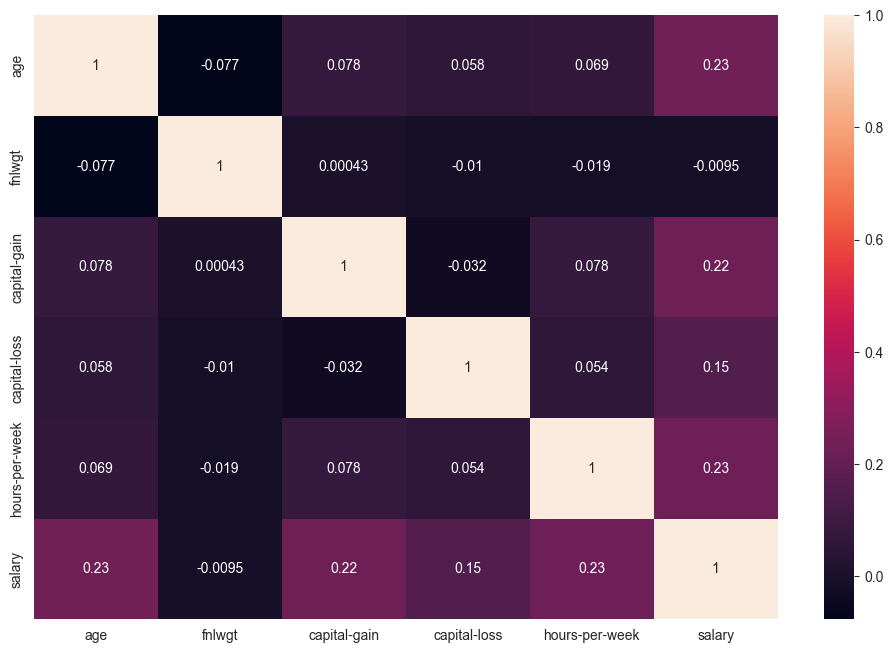

In [42]:
plt.figure(figsize = (12,8) , dpi = 100)

sns.heatmap(df.corr() , annot = True);

## Lets Dive into Columns

### age

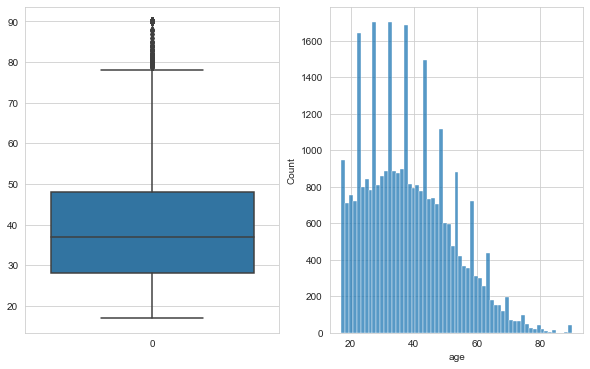

In [53]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.boxplot(data = df.age) # Çok önemli !

plt.subplot(1,2,2)
sns.histplot(data = df.age);
#plt.show()

In [44]:
# 1.5 whisker için IQR ile outlier tespiti 

In [46]:
q1 = df.age.quantile(0.25)
q1

28.0

In [47]:
q3 = df.age.quantile(0.75)
q3

48.0

In [48]:
IQR = q3 - q1
IQR

20.0

In [49]:
high_lim = q3 + IQR*1.5
high_lim

78.0

In [54]:
low_lim = q1 - IQR*1.5
low_lim

-2.0

In [58]:
df[df['age'] > 78]['age'].value_counts()

90    43
79    22
80    22
81    20
82    12
84    10
83     6
88     3
85     3
86     1
87     1
Name: age, dtype: int64

In [63]:
df[df['age'] > 78].sort_values(by = 'age' , ascending = False).head()

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
12451,90,UNKNOWN,225063,Some-college,UNKNOWN,Unmarried,Asian-Pac-Islander,Male,0,0,10,South,0
10545,90,Private,175491,HS-grad,Craft-repair,Husband,White,Male,9386,0,50,Ecuador,1
5406,90,Private,51744,Masters,Exec-managerial,Unmarried,Black,Male,0,0,50,United-States,1
19747,90,Private,226968,7th-8th,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
28463,90,Federal-gov,195433,HS-grad,Craft-repair,Husband,White,Male,0,0,30,United-States,0


## hours_per_week

In [64]:
df.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


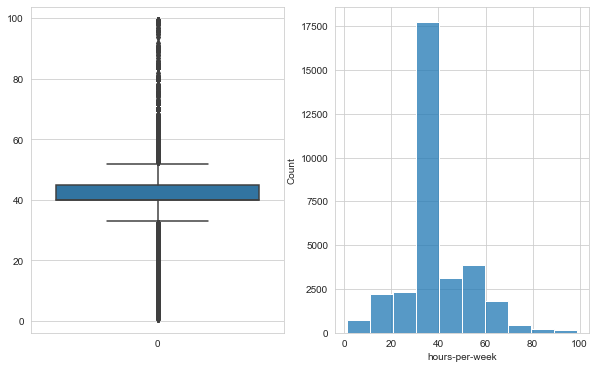

In [69]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.boxplot(data = df["hours-per-week"])
plt.subplot(1,2,2)
sns.histplot(data = df["hours-per-week"] , bins = 10);

In [70]:
q1 = df['hours-per-week'].quantile(0.25)
q1

40.0

In [71]:
q3 = df['hours-per-week'].quantile(0.75)
q3

45.0

In [72]:
IQR = q3 - q1
IQR

5.0

In [73]:
high_lim = q3 + 1.5*IQR
high_lim

52.5

In [74]:
low_lim = q1 - 1.5*IQR
low_lim

32.5

In [80]:
df[df['hours-per-week'] > 52.5]['hours-per-week'].value_counts()

60    1475
55     694
70     291
65     244
80     133
56      97
99      85
72      71
75      66
84      45
54      41
90      29
58      28
53      25
62      18
66      17
57      17
64      14
85      13
68      12
98      11
63      10
78       8
77       6
59       5
96       5
67       4
91       3
81       3
76       3
88       2
73       2
89       2
97       2
86       2
61       2
95       2
94       1
87       1
82       1
92       1
74       1
Name: hours-per-week, dtype: int64

In [83]:
df[(df["hours-per-week"] >52.5)]["hours-per-week"].value_counts().sort_index(ascending = False)

99      85
98      11
97       2
96       5
95       2
94       1
92       1
91       3
90      29
89       2
88       2
87       1
86       2
85      13
84      45
82       1
81       3
80     133
78       8
77       6
76       3
75      66
74       1
73       2
72      71
70     291
68      12
67       4
66      17
65     244
64      14
63      10
62      18
61       2
60    1475
59       5
58      28
57      17
56      97
55     694
54      41
53      25
Name: hours-per-week, dtype: int64

In [84]:
df[(df["hours-per-week"] == 99)].sample(10)

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
20036,61,Self-emp-inc,102191,Masters,Exec-managerial,Unmarried,White,Female,0,0,99,United-States,0
19399,39,Self-emp-inc,163057,Some-college,Craft-repair,Unmarried,White,Male,0,0,99,United-States,0
30036,40,Private,25005,Bachelors,Prof-specialty,Husband,White,Male,15024,0,99,United-States,1
1887,55,Self-emp-not-inc,184425,Some-college,Farming-fishing,Husband,White,Male,0,0,99,United-States,1
30992,40,Self-emp-inc,104235,Masters,Other-service,Unmarried,White,Male,0,0,99,United-States,0
27764,38,Self-emp-not-inc,152621,Bachelors,Farming-fishing,Husband,White,Male,0,0,99,United-States,0
26638,55,Self-emp-not-inc,185195,Bachelors,Exec-managerial,Husband,White,Male,0,0,99,United-States,0
8654,30,Private,103596,HS-grad,Protective-serv,Unmarried,White,Male,0,0,99,United-States,0
13858,37,Private,51264,Doctorate,Prof-specialty,Husband,White,Male,0,0,99,France,1
22313,26,Self-emp-not-inc,258306,10th,Farming-fishing,Husband,White,Male,0,0,99,United-States,0


In [85]:
df[(df["hours-per-week"] == 99) & (df['age'] >= 70)]

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
15356,90,Private,90523,HS-grad,Transport-moving,Unmarried,White,Male,0,0,99,United-States,0
16604,73,Self-emp-not-inc,102510,7th-8th,Farming-fishing,Husband,White,Male,6418,0,99,United-States,1
19997,72,Private,268861,7th-8th,Other-service,Unmarried,White,Female,0,0,99,UNKNOWN,0


In [86]:
df.groupby("workclass")["hours-per-week"].mean()

workclass
Federal-gov        41.38
Local-gov          40.98
Never-worked       28.43
Private            40.27
Self-emp-inc       48.82
Self-emp-not-inc   44.42
State-gov          39.03
UNKNOWN            31.92
Without-pay        32.71
Name: hours-per-week, dtype: float64

In [90]:
df[df['hours-per-week'] == 99].groupby('workclass').count()['age']

workclass
Federal-gov          1
Local-gov            4
Private             44
Self-emp-inc         9
Self-emp-not-inc    21
State-gov            1
UNKNOWN              5
Name: age, dtype: int64

## find outlier values which extends the upper limit in both age and hours-per-week columns

In [91]:
df[(df['age'] >= 78) & (df['hours-per-week'] >= 53)]

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
3777,80,Private,87518,Some-college,Prof-specialty,Unmarried,White,Male,0,1816,60,United-States,0
5370,90,Local-gov,227796,Masters,Exec-managerial,Husband,White,Male,20051,0,60,United-States,1
7481,83,Private,195507,HS-grad,Protective-serv,Unmarried,White,Male,0,0,55,United-States,0
7720,84,Private,241065,Masters,Prof-specialty,Unmarried,White,Male,0,0,66,United-States,0
8806,90,Private,87372,Prof-school,Prof-specialty,Husband,White,Male,20051,0,72,United-States,1
10546,78,UNKNOWN,33186,7th-8th,UNKNOWN,Husband,White,Male,0,0,60,United-States,0
11996,90,Private,40388,Bachelors,Exec-managerial,Unmarried,White,Male,0,0,55,United-States,0
12830,81,Private,201398,Masters,Prof-specialty,Unmarried,White,Male,0,0,60,UNKNOWN,0
15356,90,Private,90523,HS-grad,Transport-moving,Unmarried,White,Male,0,0,99,United-States,0
24395,83,Self-emp-inc,153183,Bachelors,Exec-managerial,Husband,White,Male,0,2392,55,United-States,1


In [95]:
drop_indexes = df[(df['age'] >= 78) & (df['hours-per-week'] >= 53)].index
drop_indexes

Int64Index([3777, 5370, 7481, 7720, 8806, 10546, 11996, 12830, 15356, 24395], dtype='int64')

In [96]:
df.shape

(32561, 13)

In [97]:
df.drop(drop_indexes , inplace = True)

In [98]:
df.shape

(32551, 13)

## Boxplot and Histplot for all numeric features

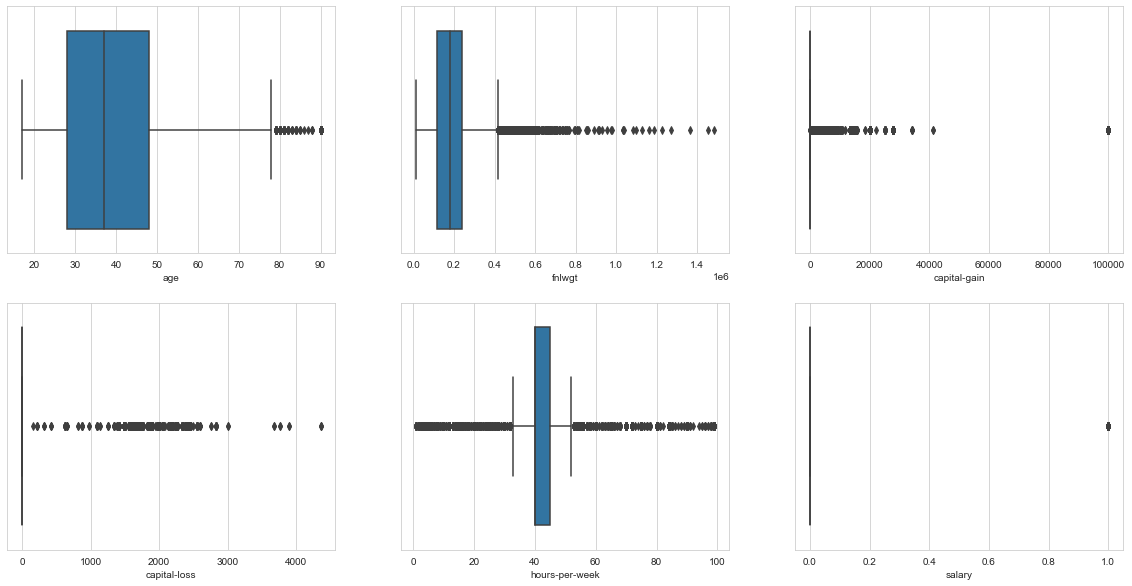

In [99]:
index = 0

plt.figure(figsize = (20,10))

for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(2,3,index)
    sns.boxplot(x = feature,data = df,whis = 1.5) 

---
## How many of each race are represented in this dataset?
---

In [101]:
df.race.value_counts()

White                 27806
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

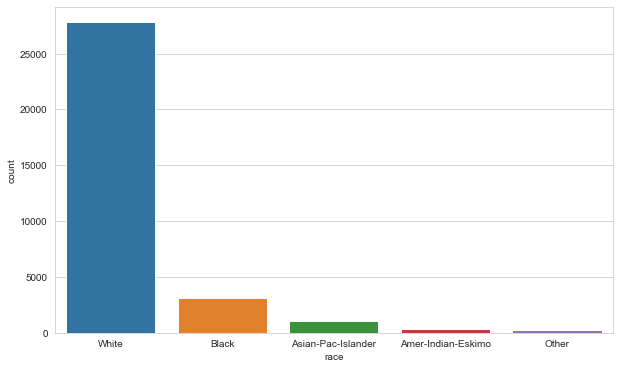

In [102]:
sns.countplot(df.race);

---
## What is the average age of men/women?
---

In [105]:
df.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [107]:
df[df['sex'] == 'Male']['age'].mean()

39.41267217630854

In [108]:
df[df['sex'] == 'Female']['age'].mean()

36.85823043357163

---
## What is the percentage of people who have a Bachelor's degree?
---

In [109]:
df.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [118]:
bachelors = df[df['education']=='Bachelors'].shape[0]
bachelors

5353

In [119]:
total = df.shape[0]
total

32551

In [120]:
perc_bachelors = bachelors / total
perc_bachelors

0.16444963288378237

In [121]:
print(f"The percentage of people who have a Bachelor's degree : %{round(perc_bachelors,2)*100}")

The percentage of people who have a Bachelor's degree : %16.0


---
## What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
---

In [123]:
df.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [122]:
df.salary.value_counts()

0    24713
1     7838
Name: salary, dtype: int64

In [127]:
higher_education = df[df['education'].isin(['Bachelors' , 'Masters' , 'Doctorate'])]
higher_education

# df[(df['education'] == 'Bachelors') | (df['education'] == 'Masters') | (df['education'] == 'Doctorate')]

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
4,28,Private,338409,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
8,31,Private,45781,Masters,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,1
32539,71,UNKNOWN,287372,Doctorate,UNKNOWN,Husband,White,Male,0,0,10,United-States,1
32544,31,Private,199655,Masters,Other-service,Unmarried,Other,Female,0,0,30,United-States,0
32553,32,Private,116138,Masters,Tech-support,Unmarried,Asian-Pac-Islander,Male,0,0,11,Taiwan,0


In [130]:
higher_education.salary.value_counts()

0    4002
1    3484
Name: salary, dtype: int64

In [134]:
high_and_rich = higher_education[higher_education.salary == 1].shape[0]
high_and_rich

3484

In [136]:
total = higher_education.shape[0]
total

7486

In [137]:
perc_high_edu = high_and_rich / total
perc_high_edu

0.4654020838899279

In [140]:
print(f"Percentage of people with advanced education make more than 50K : % {round(perc_high_edu * 100 , 2)}")

Percentage of people with advanced education make more than 50K : % 46.54


## What percentage of people without advanced education make more than 50K?

In [151]:
low_edu = df[~df.education.isin(['Bachelors' , 'Masters' , 'Doctorate'])]
low_edu

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2,38,Private,215646,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
6,49,Private,160187,9th,Other-service,Unmarried,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
10,37,Private,280464,Some-college,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,Adm-clerical,Unmarried,White,Male,0,0,20,United-States,0


In [152]:
low_edu.salary.value_counts()

0    20711
1     4354
Name: salary, dtype: int64

In [156]:
low_edu_rich = low_edu[low_edu.salary == 1].shape[0]
low_edu_rich

4354

In [159]:
total_low_edu = low_edu.shape[0]
total_low_edu

25065

In [162]:
perc_low_edu = low_edu_rich / total_low_edu
perc_low_edu

0.1737083582685019

In [163]:
print(f"Percentage of people without advanced education make more than 50K :% {round(perc_low_edu * 100 ,2)}")

Percentage of people without advanced education make more than 50K :% 17.37


In [164]:
if perc_high_edu > perc_low_edu :
    print("More education more money!")
else:
    print("Education has no clear effet on salary. You should investigate some other features also.")

More education more money!


## What percentage of the people who work the minimum number of hours per week have a salary of >50K?

In [165]:
df.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [166]:
df['hours-per-week'].min()

1

In [169]:
lazies = df[df['hours-per-week'] == df['hours-per-week'].min()]
lazies

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,Prof-specialty,Husband,White,Male,0,0,1,United-States,1
1036,66,Self-emp-inc,150726,9th,Exec-managerial,Husband,White,Male,1409,0,1,UNKNOWN,0
1262,69,UNKNOWN,195779,Assoc-voc,UNKNOWN,Unmarried,White,Female,0,0,1,United-States,0
5590,78,UNKNOWN,363134,HS-grad,UNKNOWN,Unmarried,White,Female,0,0,1,United-States,0
5632,45,UNKNOWN,189564,Masters,UNKNOWN,Wife,White,Female,0,0,1,United-States,0
5766,62,UNKNOWN,97231,Some-college,UNKNOWN,Wife,White,Female,0,0,1,United-States,0
5808,76,UNKNOWN,211574,10th,UNKNOWN,Husband,White,Male,0,0,1,United-States,0
8447,67,UNKNOWN,244122,Assoc-voc,UNKNOWN,Unmarried,White,Female,0,0,1,United-States,0
9147,75,UNKNOWN,260543,10th,UNKNOWN,Unmarried,Asian-Pac-Islander,Female,0,0,1,China,0
11451,27,Private,147951,HS-grad,Machine-op-inspct,Unmarried,White,Male,0,0,1,United-States,0


In [174]:
lazy_rich = lazies[lazies['salary'] == 1].shape[0]
lazy_rich

2

In [175]:
lazy_total = lazies.shape[0]
lazy_total

20

In [176]:
perc_lazy_rich = lazy_rich / lazy_total
perc_lazy_rich

0.1

In [180]:
print (f"Percentage of the people who work the minimum number of hours per week have a salary of >50K : % {perc_lazy_rich * 100}")

Percentage of the people who work the minimum number of hours per week have a salary of >50K : % 10.0


 ## What country has the highest percentage of people that earn >50K

In [181]:
df.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [183]:
df.groupby('native-country').count()['salary']

native-country
Cambodia                         19
Canada                          121
China                            75
Columbia                         59
Cuba                             95
Dominican-Republic               70
Ecuador                          28
El-Salvador                     106
England                          90
France                           29
Germany                         137
Greece                           29
Guatemala                        64
Haiti                            44
Holand-Netherlands                1
Honduras                         13
Hong                             20
Hungary                          13
India                           100
Iran                             43
Ireland                          24
Italy                            73
Jamaica                          81
Japan                            62
Laos                             18
Mexico                          643
Nicaragua                        34
Outlying-US(G

In [184]:
country_salary_df = df.groupby('native-country').count()['salary']
country_salary_df

native-country
Cambodia                         19
Canada                          121
China                            75
Columbia                         59
Cuba                             95
Dominican-Republic               70
Ecuador                          28
El-Salvador                     106
England                          90
France                           29
Germany                         137
Greece                           29
Guatemala                        64
Haiti                            44
Holand-Netherlands                1
Honduras                         13
Hong                             20
Hungary                          13
India                           100
Iran                             43
Ireland                          24
Italy                            73
Jamaica                          81
Japan                            62
Laos                             18
Mexico                          643
Nicaragua                        34
Outlying-US(G

In [195]:
country_riches_df = df[df['salary'] == 1].groupby('native-country')[['salary']].count()
country_riches_df

,salary
native-country,
Cambodia,7
Canada,39
China,20
Columbia,2
Cuba,25
Dominican-Republic,2
Ecuador,4
El-Salvador,9
England,30


In [197]:
rich_per_country = (country_riches_df/country_salary_df).sort_values('salary',ascending=True)
rich_per_country

,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,Greece,Guatemala,Haiti,Holand-Netherlands,Honduras,Hong,Hungary,India,Iran,Ireland,Italy,Jamaica,Japan,Laos,Mexico,Nicaragua,Outlying-US(Guam-USVI-etc),Peru,Philippines,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,UNKNOWN,United-States,Vietnam,Yugoslavia,salary
native-country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cambodia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cuba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dominican-Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ecuador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
El-Salvador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
England,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Done for now.